/Users/tinaavbelj/Mag/tourism-recommender-system/venv/lib/python3.7/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)
/Users/tinaavbelj/Mag/tourism-recommender-system/venv/lib/python3.7/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)



Preselection

Object selection: knn

Dfmf

Parameters

18 18 6 2


auc: 0.7205562370274309

Preselection

Object selection: knn

Dfmf

Parameters

10 10 6 6


auc: 0.7082965312349445

Preselection

Object selection: knn

Dfmf

Parameters

10 10 6 6


auc: 0.6940438871473354

Preselection

Object selection: knn

Dfmf

Parameters

10 10 6 6


auc: 0.6862229976230808

Preselection

Object selection: knn

Dfmf

Parameters

10 10 6 6


auc: 0.6934381554598574

Preselection

Object selection: knn

Dfmf

Parameters

10 10 6 6


auc: 0.7063048012314352

Preselection

Object selection: knn

Dfmf

Parameters

10 10 6 6


auc: 0.6812334334090663

Preselection

Object selection: knn

Dfmf

Parameters

10 10 6 6


auc: 0.7038027397260274

Preselection

Object selection: knn

Dfmf

Parameters

10 10 6 6


auc: 0.6926188170403558

Preselection

Object selection: knn

Dfmf

Parameters

10 10 6 6


auc: 0.7068471683141417


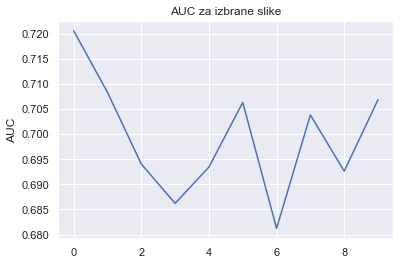

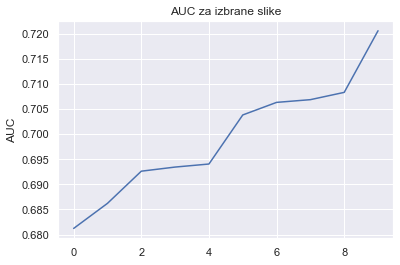

In [1]:
import os
import sys
parent_dir = os.path.split(os.getcwd())[0]
if parent_dir not in sys.path:
    sys.path.append(parent_dir)

import random
import pickle

from utils import divide_texts, save_scores
from object_selection import ObjectSelection
from load_data import load_data
import matplotlib.pyplot as plt
from basic_factorization import BasicFactorization

# Parameters
data_directory = '../../data/generated-data-r-2-n-04-l-100/'
booking_file = '../../data/booking.csv'
users_file = '../../data/user.csv'
rating_thresholds = [1, 7]
true_objects_indexes = [0, 1, 2, 3, 4, 5]
false_objects_indexes = [6, 7, 8, 9]

file_names = os.listdir(data_directory)
ids_vector = [int(name.split('-')[0]) for name in file_names]
categories_vector = [name.split('-')[1] for name in file_names]
ratings_vector = [int(name.split('.')[0].split('-')[2]) for name in file_names]
name_vector = [data_directory + name for name in file_names]

ratings_matrix, images_indexes_for_id, ids_indexes, users_matrix = load_data(data_directory, booking_file,
                                                                             users_file, rating_thresholds, binary=True)

features, new_ratings_vector, new_categories_vector, new_ids_vector, new_paths_vector, text_indexes = divide_texts(name_vector, ratings_vector, categories_vector, ids_vector, n=10)

ratings_vector = new_ratings_vector
ids_vector = new_ids_vector

cv_results_file = '../results/cv-generated-data-r-2-n-04-l-100-knn.csv'
scores = []
for _ in range(10):
    selection = ObjectSelection(show_selection_results=False, selection_algorithm='knn')
    selection.transform(ids=ids_vector, features=features, ratings=ratings_vector, users_ratings=ratings_matrix,
                        users=users_matrix, cv_results_file=cv_results_file, images_indexes=text_indexes,
                        true_objects_indexes=true_objects_indexes, false_objects_indexes=false_objects_indexes,
                        paths=name_vector)
    score = selection.evaluate(evaluation_metric='auc')
    scores.append(score)
    
plt.title('AUC za izbrane slike')
plt.plot(scores)
plt.ylabel('AUC')
plt.show()

scores.sort()
plt.title('AUC za izbrane slike')
plt.plot(scores)
plt.ylabel('AUC')
plt.show()

results_file = '../scores/generated-data-r-2-n-04-l-100-knn.csv'
save_scores(scores, results_file)


Preselection

Object selection: rf

Dfmf

Parameters

18 18 8 2


auc: 0.7389421127505893

Preselection

Object selection: rf

Dfmf

Parameters

10 10 4 4


auc: 0.701384533419656

Preselection

Object selection: rf

Dfmf

Parameters

10 10 4 4


auc: 0.7088154506437769

Preselection

Object selection: rf

Dfmf

Parameters

10 10 4 4


auc: 0.7098558543829533

Preselection

Object selection: rf

Dfmf

Parameters

10 10 4 4


auc: 0.6864476724991746

Preselection

Object selection: rf

Dfmf

Parameters

10 10 4 4


auc: 0.7091515319655715

Preselection

Object selection: rf

Dfmf

Parameters

10 10 4 4


auc: 0.6921991195347597

Preselection

Object selection: rf

Dfmf

Parameters

10 10 4 4


auc: 0.7045660020800902

Preselection

Object selection: rf

Dfmf

Parameters

10 10 4 4


auc: 0.6691632192710111

Preselection

Object selection: rf

Dfmf

Parameters

10 10 4 4


auc: 0.6939602138109393


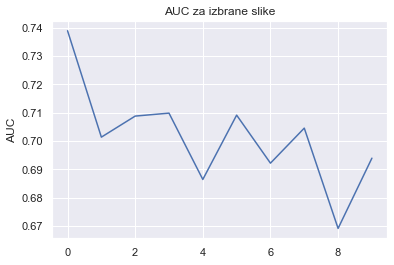

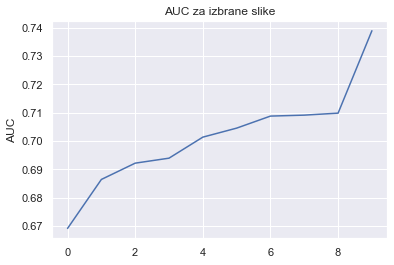

In [2]:
cv_results_file = '../results/cv-generated-data-r-2-n-04-l-100-rf.csv'
scores = []
for _ in range(10):
    selection = ObjectSelection(show_selection_results=False, selection_algorithm='rf')
    selection.transform(ids=ids_vector, features=features, ratings=ratings_vector, users_ratings=ratings_matrix,
                        users=users_matrix, cv_results_file=cv_results_file, images_indexes=text_indexes,
                        true_objects_indexes=true_objects_indexes, false_objects_indexes=false_objects_indexes,
                        paths=name_vector)
    score = selection.evaluate(evaluation_metric='auc')
    scores.append(score)
    
plt.title('AUC za izbrane slike')
plt.plot(scores)
plt.ylabel('AUC')
plt.show()

scores.sort()
plt.title('AUC za izbrane slike')
plt.plot(scores)
plt.ylabel('AUC')
plt.show()

results_file = '../scores/generated-data-r-2-n-04-l-100-rf.csv'
save_scores(scores, results_file)

Object selection: random

Dfmf

Parameters

18 16 2 2


auc: 0.7300438955790394
Object selection: random

Dfmf

Parameters

12 10 6 8


auc: 0.7010255963956847
Object selection: random

Dfmf

Parameters

12 10 6 8


auc: 0.6909198711063372
Object selection: random

Dfmf

Parameters

12 10 6 8


auc: 0.6963222785506429
Object selection: random

Dfmf

Parameters

12 10 6 8


auc: 0.7175607795860961
Object selection: random

Dfmf

Parameters

12 10 6 8


auc: 0.69274064171123
Object selection: random

Dfmf

Parameters

12 10 6 8


auc: 0.7117641603725953
Object selection: random

Dfmf

Parameters

12 10 6 8


auc: 0.6784948598616241
Object selection: random

Dfmf

Parameters

12 10 6 8


auc: 0.6819279978222403
Object selection: random

Dfmf

Parameters

12 10 6 8


auc: 0.6867811158798284


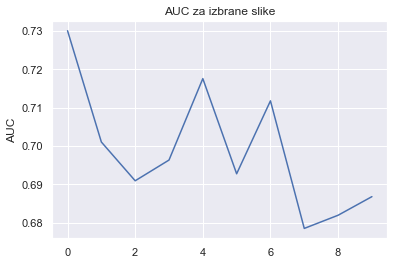

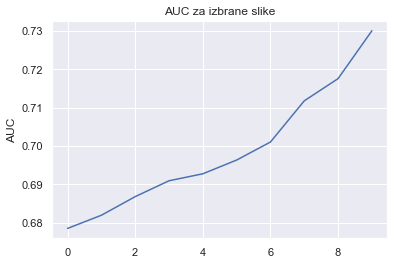

In [3]:
cv_results_file = '../results/cv-generated-data-r-2-n-04-l-100-random.csv'
scores = []
for _ in range(10):
    selection = ObjectSelection(show_selection_results=False, selection_algorithm='random')
    selection.transform(ids=ids_vector, features=features, ratings=ratings_vector, users_ratings=ratings_matrix,
                        users=users_matrix, cv_results_file=cv_results_file, images_indexes=text_indexes,
                        true_objects_indexes=true_objects_indexes, false_objects_indexes=false_objects_indexes,
                        paths=name_vector)
    score = selection.evaluate(evaluation_metric='auc')
    scores.append(score)
    
plt.title('AUC za izbrane slike')
plt.plot(scores)
plt.ylabel('AUC')
plt.show()

scores.sort()
plt.title('AUC za izbrane slike')
plt.plot(scores)
plt.ylabel('AUC')
plt.show()

results_file = '../scores/generated-data-r-2-n-04-l-100-random.csv'
save_scores(scores, results_file)

Object selection: random

Dfmf

auc: 0.7193233844755881
Object selection: random

Dfmf

auc: 0.7146729877248489
Object selection: random

Dfmf

auc: 0.7222349074554576
Object selection: random

Dfmf

auc: 0.7239704417832007
Object selection: random

Dfmf

auc: 0.7196311966950959
Object selection: random

Dfmf

auc: 0.7297179138810046
Object selection: random

Dfmf

auc: 0.7232879161874842
Object selection: random

Dfmf

auc: 0.7330955439853946
Object selection: random

Dfmf

auc: 0.7215908126512751
Object selection: random

Dfmf

auc: 0.7276689303904924


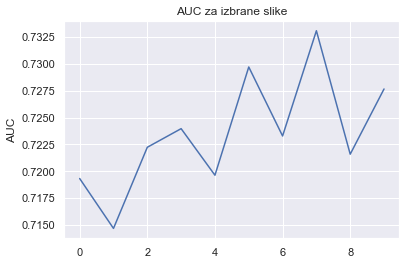

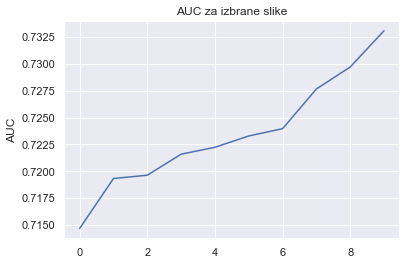

In [4]:
cv_results_file = '../results/cv-generated-data-r-2-n-04-l-100-knn.csv'
scores = []
for _ in range(10):
    selection = BasicFactorization(show_selection_results=False, selection_algorithm='random')
    selection.transform(ids=ids_vector, features=features, ratings=ratings_vector, users_ratings=ratings_matrix,
                        users=users_matrix, cv_results_file=cv_results_file, images_indexes=text_indexes,
                        true_objects_indexes=true_objects_indexes, false_objects_indexes=false_objects_indexes,
                        paths=name_vector)
    score = selection.evaluate(evaluation_metric='auc')
    scores.append(score)
    
plt.title('AUC za izbrane slike')
plt.plot(scores)
plt.ylabel('AUC')
plt.show()

scores.sort()
plt.title('AUC za izbrane slike')
plt.plot(scores)
plt.ylabel('AUC')
plt.show()

results_file = '../scores/generated-data-r-2-n-04-l-100-b.csv'
save_scores(scores, results_file)